# Transaction_retail.csv
Problem Statement: - 
A retail store in India, has its transaction data, and it would like to know the buying pattern of the 
consumers in its locality, you have been assigned this task to provide the manager with rules 
on how the placement of products needs to be there in shelves so that it can improve the buying
patterns of consumes and increase customer footfall. 


In [1]:
!pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
transactions_retail1 = []
with open("transactions_retail1.csv") as f:
    transactions_retail1 = f.read()


In [3]:
# splitting the data into separate transactions using separator as "\n"
transactions_retail1 = transactions_retail1.split("\n")


In [4]:

transactions_retail1_list = []
for i in transactions_retail1:
    transactions_retail1_list.append(i.split(","))


In [5]:
all_transactions_retail1_list = [i for item in transactions_retail1_list for i in item]

from collections import Counter # ,OrderedDict

item_frequencies = Counter(all_transactions_retail1_list)


In [6]:
# after sorting
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])


In [7]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


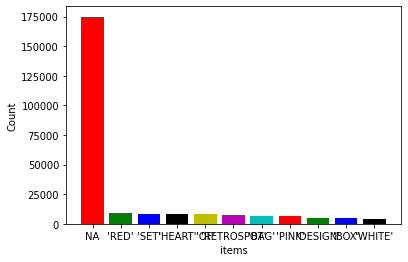

In [8]:
# barplot of top 10 
import matplotlib.pyplot as plt

plt.bar(height = frequencies[0:11], x = list(range(0, 11)), color = 'rgbkymc')
plt.xticks(list(range(0, 11), ), items[0:11])
plt.xlabel("items")
plt.ylabel("Count")
plt.show()


In [9]:
# Creating Data Frame for the transactions data
transactions_retail1_series = pd.DataFrame(pd.Series(transactions_retail1_list))
transactions_retail1_series = transactions_retail1_series.iloc[:557041, :] # removing the last empty transaction


In [10]:
transactions_retail1_series.columns = ["transactions"]



In [11]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X =transactions_retail1_series['transactions'].str.join(sep = '*').str.get_dummies(sep = '*')

frequent_itemsets = apriori(X, min_support = 0.0075, max_len = 4, use_colnames = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


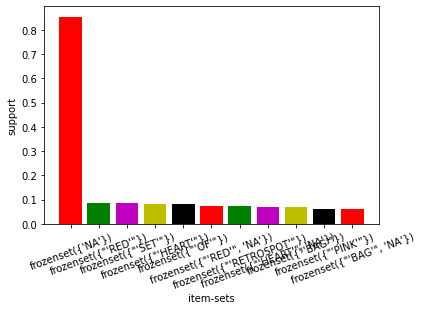

In [12]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)

plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [13]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
472,"('OF', 'CASES')","('PACK', 'CAKE')",0.008167,0.008167,0.008167,1.000000,122.444848,0.008100,inf
473,"('PACK', 'CAKE')","('OF', 'CASES')",0.008167,0.008167,0.008167,1.000000,122.444848,0.008100,inf
410,('BAKELIKE'),('ALARM'),0.008810,0.009196,0.008810,1.000000,108.737352,0.008729,inf
422,('BAKELIKE'),"('CLOCK', 'ALARM')",0.008810,0.009196,0.008810,1.000000,108.737352,0.008729,inf
411,('ALARM'),('BAKELIKE'),0.009196,0.008810,0.008810,0.958019,108.737352,0.008729,23.610645
413,"(NA, 'ALARM')",('BAKELIKE'),0.009196,0.008810,0.008810,0.958019,108.737352,0.008729,23.610645
414,"('BAKELIKE', NA)",('ALARM'),0.008810,0.009196,0.008810,1.000000,108.737352,0.008729,inf
415,('ALARM'),"('BAKELIKE', NA)",0.009196,0.008810,0.008810,0.958019,108.737352,0.008729,23.610645
416,('BAKELIKE'),"(NA, 'ALARM')",0.008810,0.009196,0.008810,1.000000,108.737352,0.008729,inf
418,"('CLOCK', 'BAKELIKE')",('ALARM'),0.008810,0.009196,0.008810,1.000000,108.737352,0.008729,inf


In [14]:
################################# Extra part ###################################
def to_list(i):
    return (sorted(list(i)))


In [15]:

ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [16]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]


In [17]:

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
418,"('CLOCK', 'BAKELIKE')",('ALARM'),0.008810,0.009196,0.008810,1.000000,108.737352,0.008729,inf
410,('BAKELIKE'),('ALARM'),0.008810,0.009196,0.008810,1.000000,108.737352,0.008729,inf
514,('KNOB'),('DRAWER'),0.008068,0.010058,0.008068,1.000000,99.426181,0.007987,inf
586,('UNION'),('JACK'),0.012038,0.007573,0.007573,0.629112,83.073191,0.007482,2.675812
396,('GIRL'),('DOLLY'),0.010058,0.010939,0.008929,0.887795,81.160557,0.008819,8.814791
392,('CLOCK'),('ALARM'),0.013037,0.009196,0.009196,0.705391,76.702354,0.009077,3.363114
406,('CLOCK'),('BAKELIKE'),0.013037,0.008810,0.008810,0.675778,76.702354,0.008696,3.057135
532,('HAND'),('WARMER'),0.010226,0.011008,0.007969,0.779284,70.792172,0.007856,4.480828
542,"('60', 'CAKE')",('CASES'),0.007959,0.016888,0.007959,1.000000,59.212778,0.007825,inf
548,('60'),('CASES'),0.007959,0.016888,0.007959,1.000000,59.212778,0.007825,inf


In [18]:
rules_no_redudancy.to_csv("transactional_retailArules.csv",encoding="utf 8")


In [19]:
import os
os.getcwd()


'/content'